In [49]:
# data manipulation
import pickle
import numpy as np

# ML
from gensim.models import KeyedVectors
from gensim.models.ldamodel import LdaModel
from sklearn.manifold import TSNE

# plotting
import matplotlib.pyplot as plt

In [42]:
# global parameters for plots
plt.style.use("fast")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

In [2]:
generations = []
for n in range (1900, 2001, 20):
    generations.append((str(n) + "," + str(n+19)))
generations

['1900,1919', '1920,1939', '1940,1959', '1960,1979', '1980,1999', '2000,2019']

In [50]:
freqs_tups = pickle.load(open("../data/freqs_tups.pickle", "rb"))

In [5]:
lda = LdaModel.load("../data/large_files/lda_global_v1")

In [11]:
palette = ["#008b8b", "#ffa500", "#00ff00", "#0000ff", "#ff1493"]

In [56]:
n = 200
words_color_dict = zip([tup[0] for tup in freqs_tups][:n], ["grey"]*200)

In [57]:
topic_words_colors = {}
for topic_tup in lda.show_topics(formatted=False, num_words=10):
    for word_tup in topic_tup[1]:
        if word_tup[0] not in topic_words_colors.keys():
            topic_words_colors[word_tup[0]] = palette[topic_tup[0]]

In [58]:
words_color_dict.update(topic_words_colors)

In [59]:
words_color_dict

{'God': '#00ff00',
 'Paul': '#ffa500',
 'church': '#ffa500',
 'Christian': '#ffa500',
 'new': '#ffa500',
 'Jesus': '#ffa500',
 'Christ': '#ffa500',
 'work': '#008b8b',
 'man': '#ff1493',
 'book': 'grey',
 'time': '#ff1493',
 'life': '#ff1493',
 'use': '#0000ff',
 'text': '#008b8b',
 'word': 'grey',
 'come': 'grey',
 'people': '#ff1493',
 'way': '#ffa500',
 'world': '#0000ff',
 'gospel': 'grey',
 'study': '#0000ff',
 'John': '#ff1493',
 'mean': 'grey',
 'faith': '#008b8b',
 'Spirit': 'grey',
 'write': 'grey',
 'law': '#ff1493',
 'letter': '#00ff00',
 'find': 'grey',
 'know': 'grey',
 'century': '#0000ff',
 'Jewish': '#0000ff',
 'history': '#00ff00',
 'Testament': 'grey',
 'place': 'grey',
 'good': '#0000ff',
 'human': '#0000ff',
 'understand': 'grey',
 'woman': 'grey',
 'theology': '#ffa500',
 'great': '#00ff00',
 'religious': '#00ff00',
 'read': 'grey',
 'act': 'grey',
 'lord': 'grey',
 'saint': 'grey',
 'point': '#ff1493',
 'tradition': '#ffa500',
 'live': 'grey',
 'love': '#00ff00',


In [21]:
gen = generations[-2]
model_vectors_loaded = KeyedVectors.load("../data/large_files/model_vectors_{}.wv".format(gen))

In [28]:
model_vectors_loaded.vectors

array([[ 1.15011506e-01, -1.32526636e-01,  1.45006165e-01, ...,
         3.65940422e-01,  8.64236504e-02, -1.24267831e-01],
       [-4.12471473e-01, -2.85621703e-01,  6.64912522e-01, ...,
         1.72427520e-01,  1.45495582e+00, -6.69073880e-01],
       [-6.75414443e-01, -4.58101183e-03,  8.64319623e-01, ...,
        -1.47582144e-01,  9.37301368e-02, -1.00512707e+00],
       ...,
       [-2.92880624e-03,  5.95554663e-03,  2.18586600e-03, ...,
         3.82745429e-03, -6.10891730e-03,  5.28873038e-03],
       [-1.03206985e-01, -1.45226002e-01, -2.98055373e-02, ...,
         3.20867859e-02,  2.10440792e-02, -5.09204194e-02],
       [-5.66280354e-03, -6.56541961e-04,  4.01763106e-03, ...,
        -6.59602461e-03, -3.15731205e-03, -9.42710263e-04]], dtype=float32)

In [34]:
vocabulary = model_vectors_loaded.index_to_key

In [ ]:
model_vectors_loaded

In [36]:
def get_tsne_coors(vectors, vocabulary, perplexity=10):
    # inverse similarity to distance
    #data = (1 - sim_matrix) / 1
    vectors = np.array()
    words = vocabulary
    #data.round(5)
    # tSNE to project all words into a 2-dimensional space
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, metric='cosine', n_iter=1000) # dissimilarity="precomputed",
    #tsne = TSNE(n_components=2, random_state=42, perplexity=18, metric='precomputed', n_iter=5000) # dissimilarity="precomputed",
    pos = tsne.fit_transform(vectors) # project all points into space
    xs, ys = pos[:, 0], pos[:, 1]
    # extract minimal and maximal values
    minmax = [pos[:, 0].min(), pos[:, 0].max(), pos[:, 1].min(), pos[:, 1].max()]
    # normalize on scale from 0 to 1
    xs = (xs - minmax[0]) / (minmax[1] - minmax[0])
    ys = (ys - minmax[2]) / (minmax[3] - minmax[2])
    return xs, ys, words

In [38]:
xs, ys, words = get_tsne_coors(model_vectors_loaded.vectors, vocabulary, perplexity=10)

/Users/kasev/Projects/mops/mops_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kasev/Projects/mops/mops_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [63]:
np.random.randint(0,359)

181

(0.0, 1.0, 0.0, 1.0)

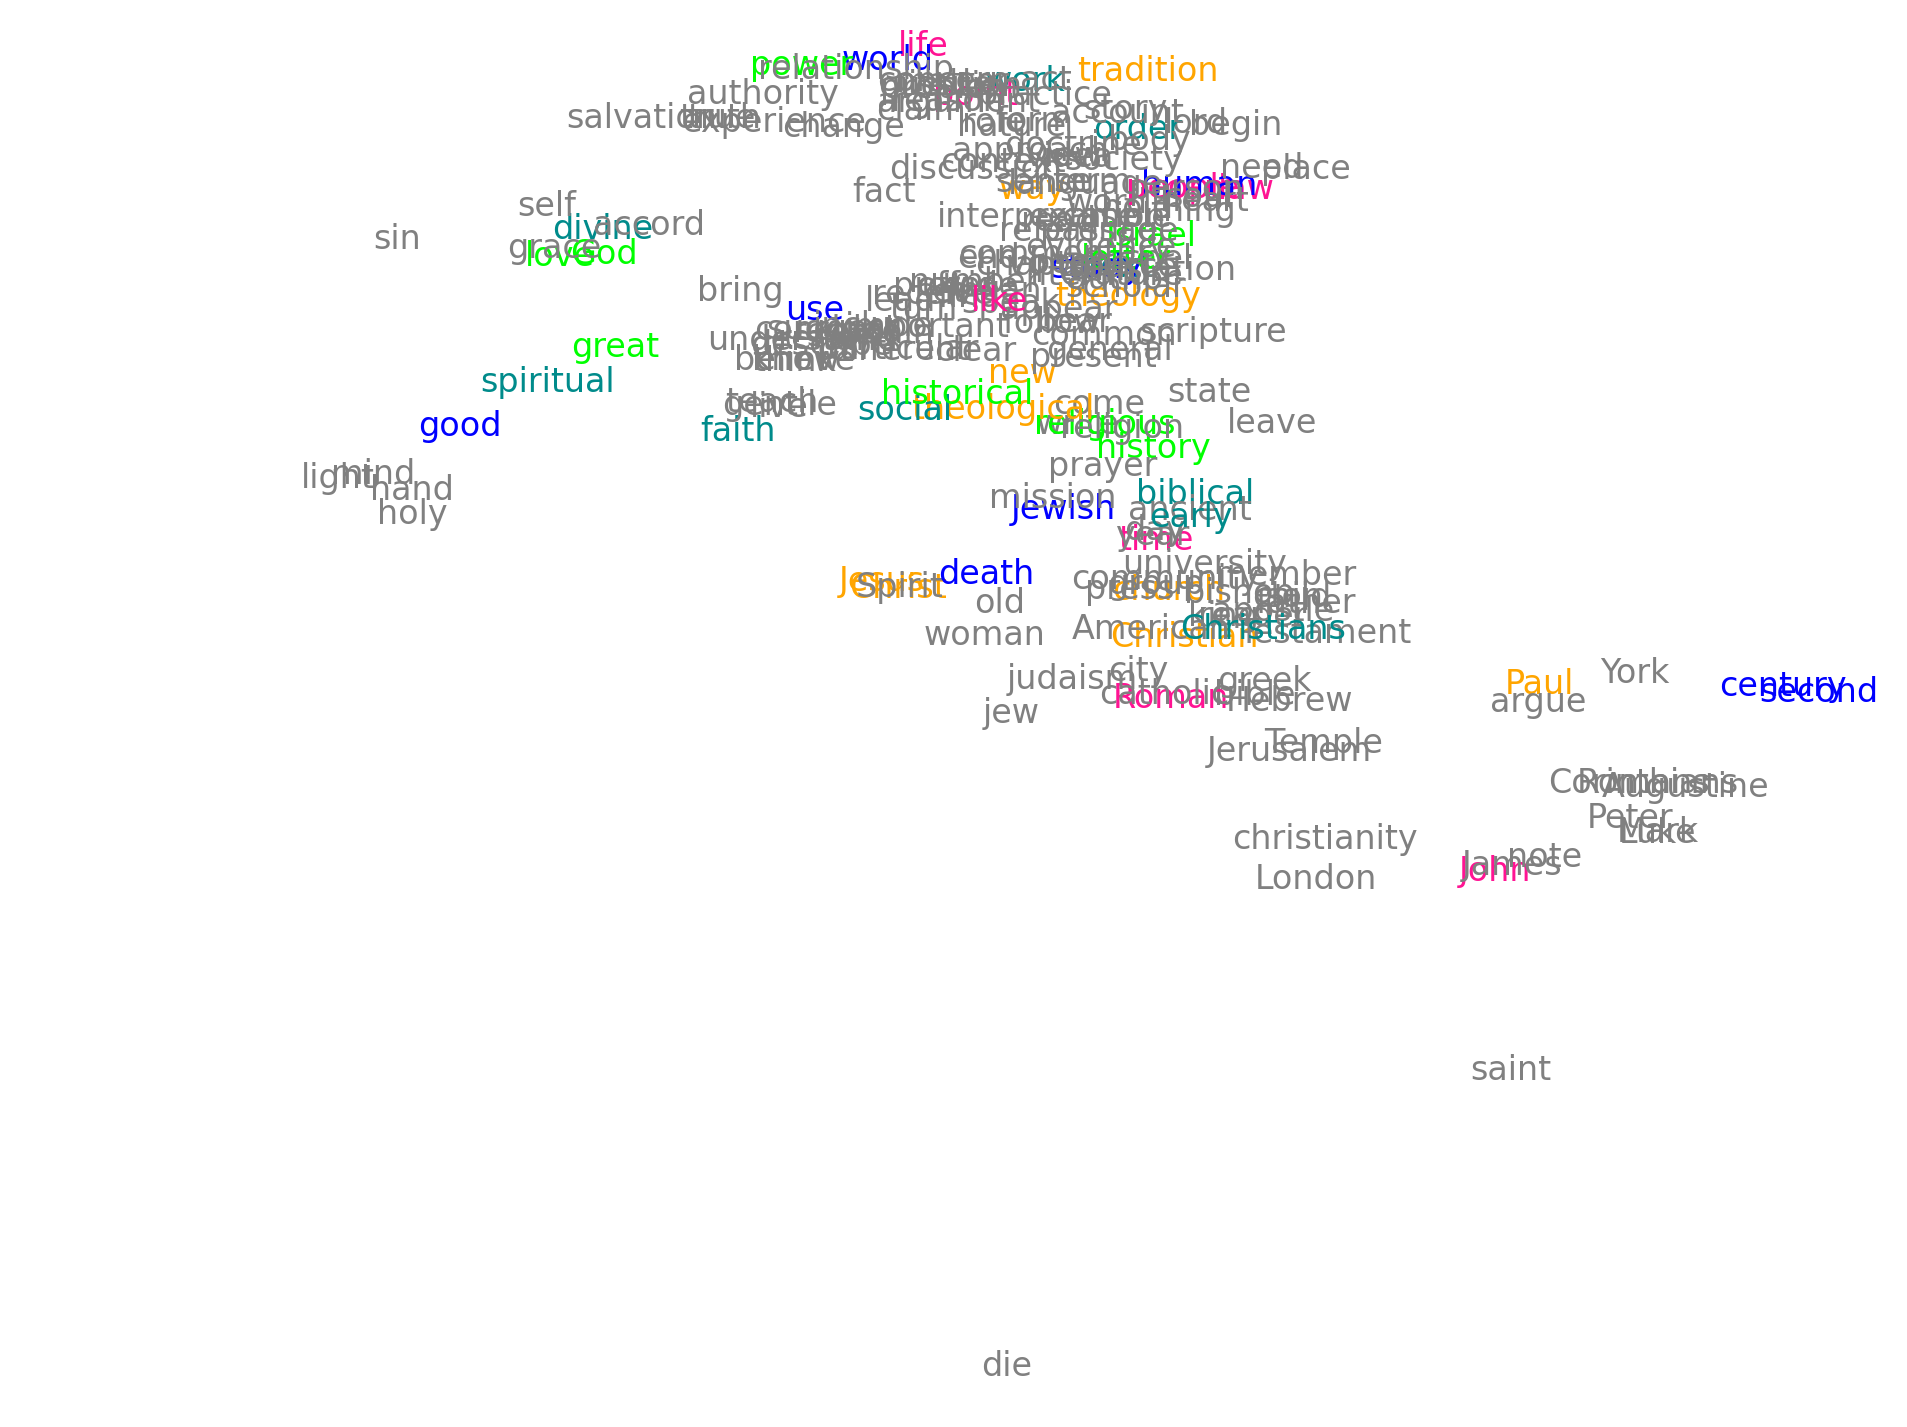

In [65]:
fig, ax = plt.subplots(tight_layout=True)

for x, y, word in zip(xs, ys, words):
    if word in words_color_dict.keys():
        ax.text(x, y, word, horizontalalignment='center', fontsize=8, color=words_color_dict[word])#  rotation=np.random.randint(0,359))

ax.axis("off")

#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)